## Importing packages

In [5]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Matplotlib is building the font cache; this may take a moment.


In [6]:
# %pip install matplotlib.pyplot


## Loading the dataset

#### The data used for this project was located in the river_water_parameters.csv file. To better manipulate and analyse this file, it was loaded into a Pandas data frame using the Pandas function, .read_csv() 

In [9]:
# loading dataset

df = pd.read_csv('C:/Users/gumul001/Downloads/River water parameters.csv')

In [10]:
# Show sample of the dataset

df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [11]:
# Display number of rows and columns of the dataframe

df.shape

(219, 16)

#### The dataset consists of 219 rows (observations) and 16 columns (features)

In [12]:
# Display summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

## Data cleaning

In [13]:
# Change column names 

# Renaming columns
df = df.rename(columns={'Date (DD/MM/YYYY)': 'Date', 
                        'Time (24 hrs XX:XX)': 'Time', 
                        'Ambient temperature (°C)': 'Ambient temperature',
                        'Sample temperature (°C)': 'Sample temperature', 
                        'EC\n(µS/cm)': 'EC', 
                        'TDS\n(mg/L)': 'TDS',
                        'TSS\n(mL sed/L)': 'TSS', 
                        'DO\n(mg/L)': 'DO', 
                        'Level\n(cm)': 'Level',
                        'Turbidity (NTU)': 'Turbidity', 
                        'Hardness\n(mg CaCO3/L)': 'Hardness', 
                        'Total Cl-\n(mg Cl-/L)': 'Total Cl'})

In [14]:
# Check null values

df.isna().sum()

Date                        0
Time                        0
Sampling point              0
Ambient temperature         0
Ambient humidity            0
Sample temperature          0
pH                          0
EC                          0
TDS                         0
TSS                         6
DO                          0
Level (cm)                 39
Turbidity                   1
Hardness                    2
Hardness classification     2
Total Cl                    6
dtype: int64

#### The columns TSS, Level, Turbidity, Hardness, Hardness classification and Total Cl have null values. The level column has the highest number of null values (36)

In [15]:
# Imputing the null values for each column

# Fill missing TSS\n(mL sed/L) with the mean TSS
df['TSS'] = df['TSS'].fillna(df['TSS'].mean())

# Fill missing Level values with 0
df['Level (cm)'] = df['Level (cm)'].fillna(0)

# Fill missing Turbidity (NTU) with the mean Turbidity
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].mean())

# Fill missing Hardness\n(mg CaCO3/L) with the mean Hardness\n(mg CaCO3/L)
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].mean())

# Fill missing Hardness classification with the mode Hardness classification 
df['Hardness classification'] = df['Hardness classification'].fillna(df['Hardness classification'].mode())

# Fill missing Total Cl-\n(mg Cl-/L)  with the mean Total Cl-\n(mg Cl-/L) 
df['Total Cl'] = df['Total Cl'].fillna(df['Total Cl'].mean())

In [16]:
# Count number of duplicate rows

num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(0)

#### There are no duplicated rows

In [17]:
# Count number of unique values in each column

df.nunique()

Date                        23
Time                        31
Sampling point               5
Ambient temperature         21
Ambient humidity            18
Sample temperature          89
pH                          16
EC                          90
TDS                         54
TSS                         44
DO                         179
Level (cm)                  16
Turbidity                  187
Hardness                    65
Hardness classification      2
Total Cl                    68
dtype: int64

## Exploratory Data Analysis (EDA)

In [18]:
## Change date and time oclumns to datetime types

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [19]:
# separate numerical and categorical data


num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(include = ['object']).columns

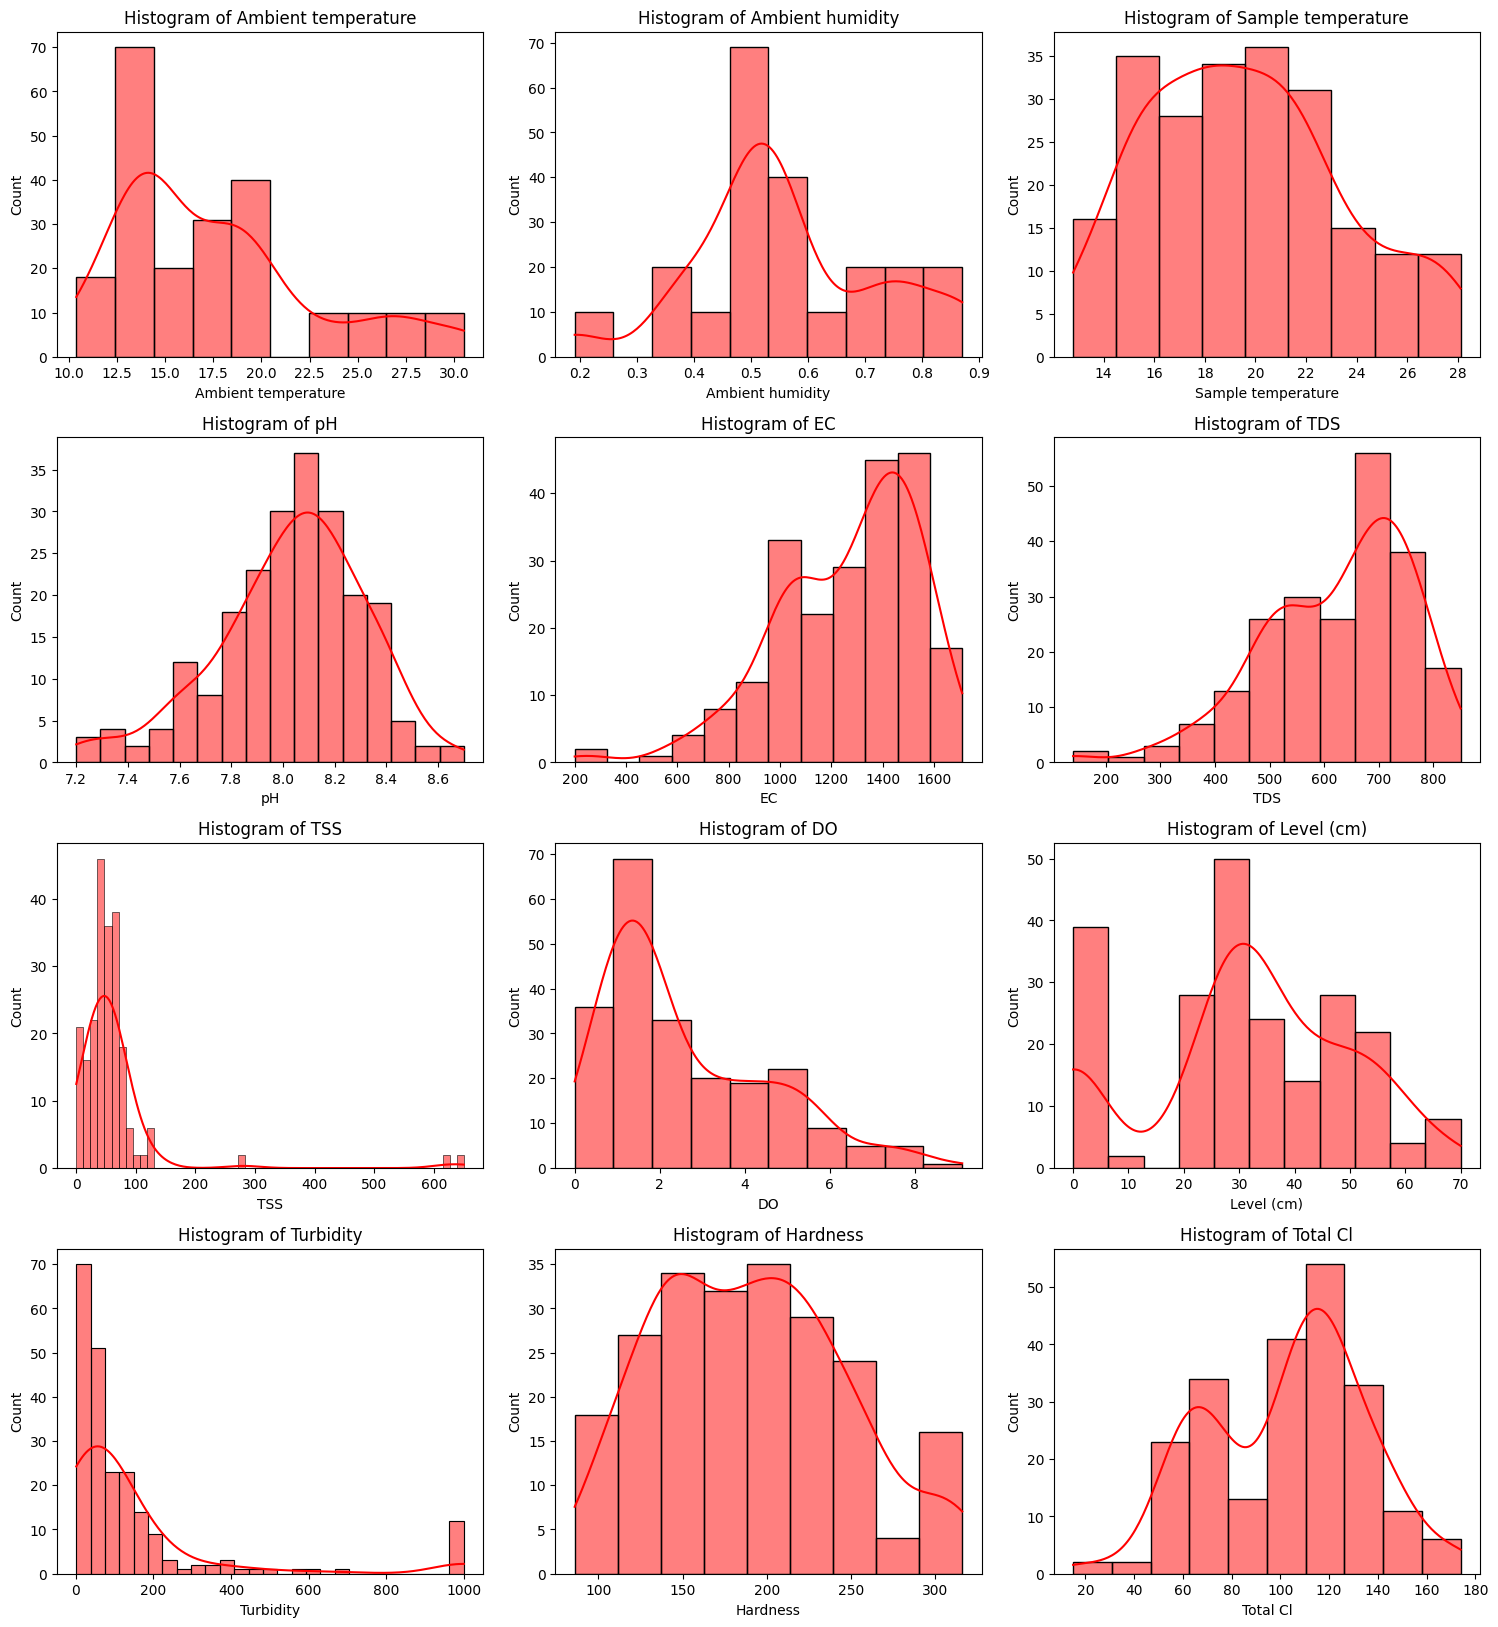

In [20]:
# Histograms for numerical columns

plt.figure(figsize = (15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(df[col], kde = True, color = 'red')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

#### Observations

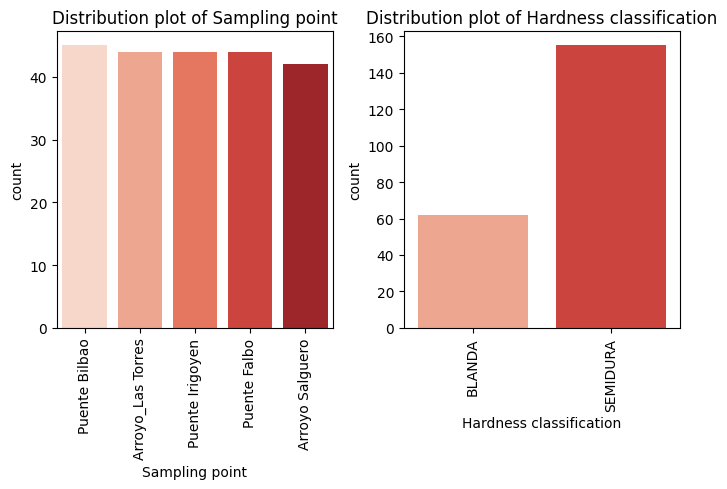

In [21]:
# Count plots for categorical columns

plt.figure(figsize=(10, 5))
for i, col in enumerate(cat_cols):
    if col != 'Time':
        plt.subplot(math.ceil(len(cat_cols) / 3), 3, i + 1)
        sns.countplot(x = df[col], palette = 'Reds')
        plt.title(f'Distribution plot of {col}')
        plt.xticks(rotation = 90)
        plt.tight_layout()
plt.show()

#### Observations

# Level

In [40]:
# %pip install plotly
# %pip install --upgrade nbformat
# %pip install nbformat
%pip uninstall nbformat
%pip install nbformat



^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import nbformat
print(nbformat.__version__)


5.10.4


In [42]:
import plotly.express as px

fig = px.histogram(df, x="Level (cm)")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

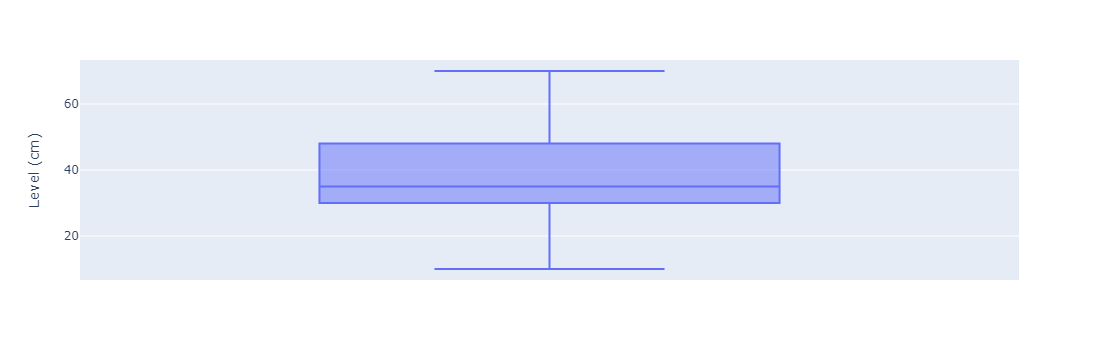

In [ ]:
import plotly.express as px

fig = px.box(df, y="Level (cm)")
fig.show()

Imputing the nulls values with the median since the data is skewed

In [ ]:
df['Level (cm)'] = df['Level (cm)'].fillna(df['Level (cm)'].median())

# TSS\n(mL sed/L) 

In [27]:
import plotly.express as px

fig = px.histogram(df, x="TSS\n(mL sed/L)")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Time', 'Sampling point', 'Ambient temperature', 'Ambient humidity', 'Sample temperature', 'pH', 'EC', 'TDS', 'TSS', 'DO', 'Level (cm)', 'Turbidity', 'Hardness', 'Hardness classification', 'Total Cl'] but received: TSS
(mL sed/L)

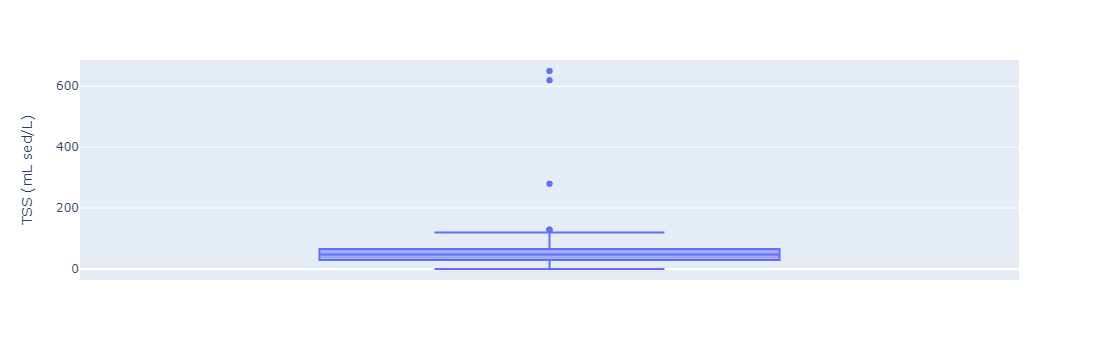

In [ ]:
import plotly.express as px

fig = px.box(df, y="TSS\n(mL sed/L)")
fig.show()

Imputing the nulls values with the median since the data is skewed

In [28]:
df['LTSS\n(mL sed/L)'] = df['TSS\n(mL sed/L)'].fillna(df['TSS\n(mL sed/L)'].median())

KeyError: 'TSS\n(mL sed/L)'

# Turbidity (NTU)    

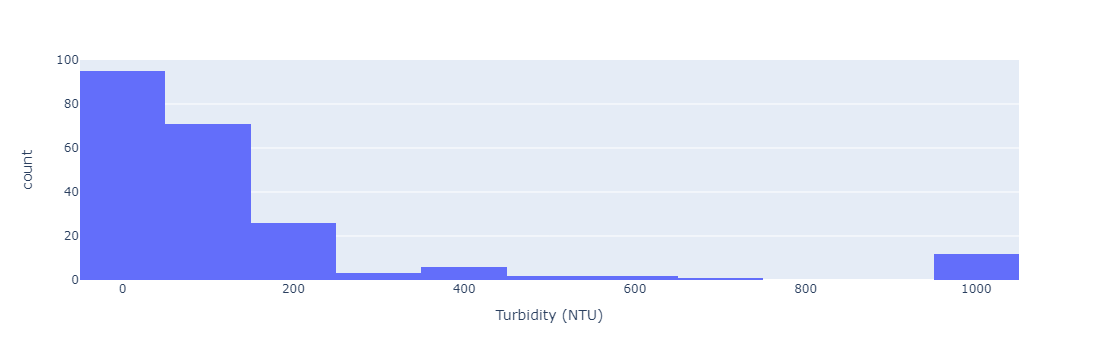

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Turbidity (NTU)")
fig.show()

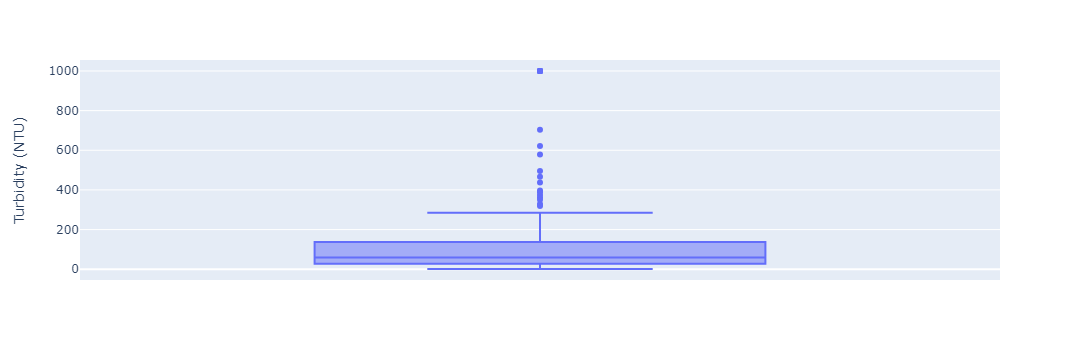

In [ ]:
import plotly.express as px

fig = px.box(df, y="Turbidity (NTU)")
fig.show()

In [29]:
df['Turbidity (NTU)'] = df['Turbidity (NTU)'].fillna(0)

KeyError: 'Turbidity (NTU)'

# Hardness\n(mg CaCO3/L) 

In [30]:
import plotly.express as px

fig = px.histogram(df, x="Hardness\n(mg CaCO3/L)")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Date', 'Time', 'Sampling point', 'Ambient temperature', 'Ambient humidity', 'Sample temperature', 'pH', 'EC', 'TDS', 'TSS', 'DO', 'Level (cm)', 'Turbidity', 'Hardness', 'Hardness classification', 'Total Cl'] but received: Hardness
(mg CaCO3/L)

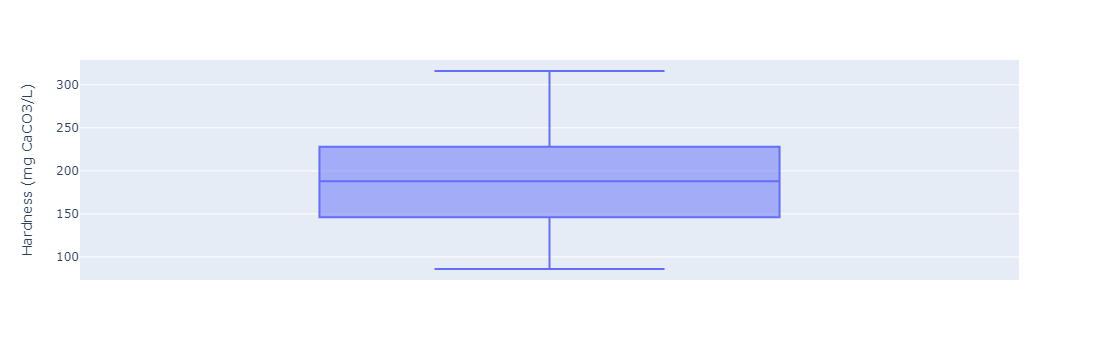

In [ ]:
import plotly.express as px

fig = px.box(df, y="Hardness\n(mg CaCO3/L)")
fig.show()

In [ ]:
df['Hardness\n(mg CaCO3/L)'] = df['Hardness\n(mg CaCO3/L)'].fillna(df['Hardness\n(mg CaCO3/L)'].mean())

# Hardness classification

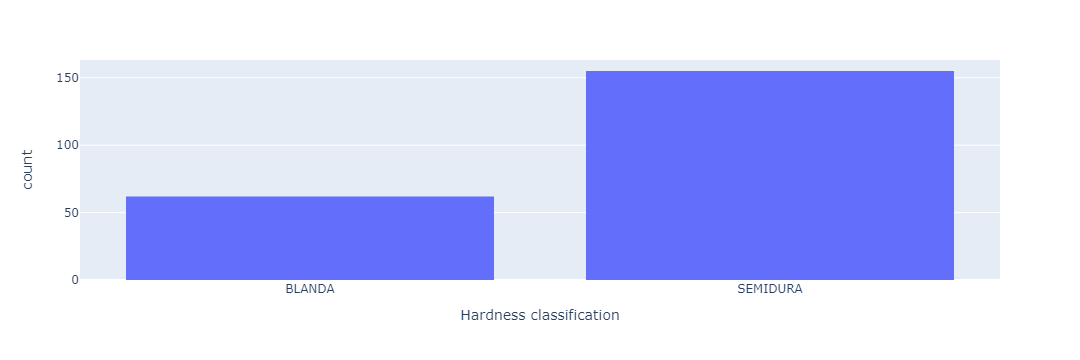

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Hardness classification")
fig.show()

In [ ]:
df['Hardness classification'] = df['Hardness classification'].fillna(df['Hardness classification'].mode())

# Total Cl-\n(mg Cl-/L)

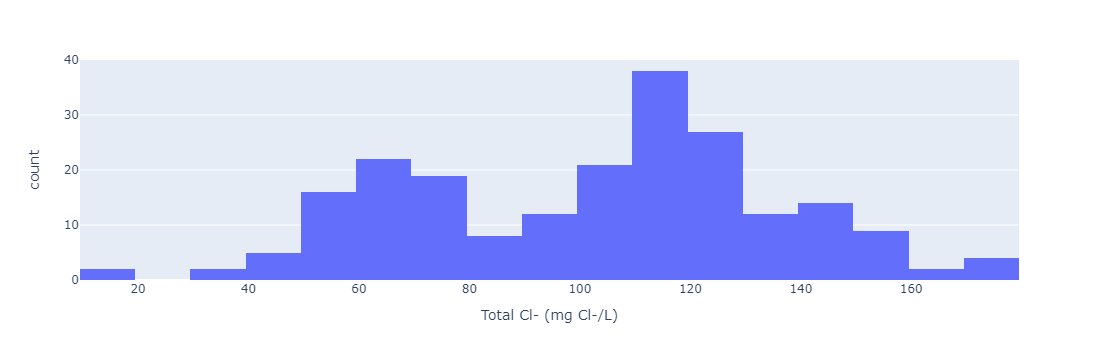

In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Total Cl-\n(mg Cl-/L)")
fig.show()

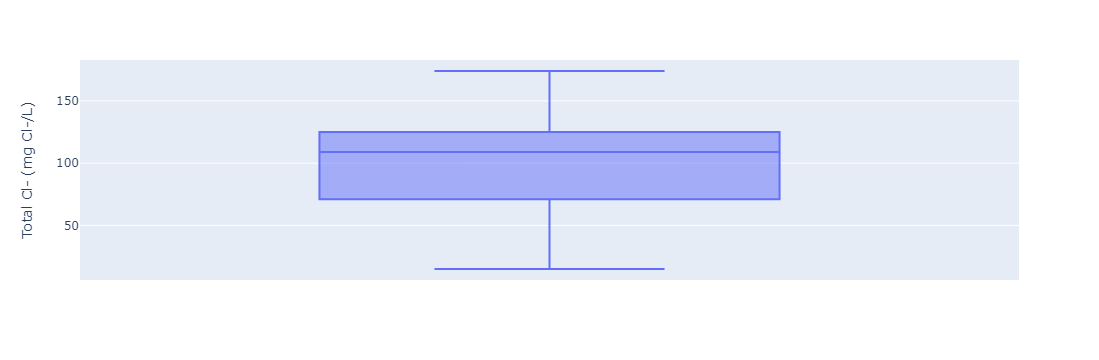

In [ ]:
import plotly.express as px

fig = px.box(df, y="Total Cl-\n(mg Cl-/L)")
fig.show()

In [ ]:
 df['Total Cl-\n(mg Cl-/L)'] = df['Total Cl-\n(mg Cl-/L)'].fillna(df['Total Cl-\n(mg Cl-/L)'].median())

In [ ]:
# Checking duplicates

In [23]:
import plotly.express as px

fig = px.histogram(df, x="Total Cl-\n(mg Cl-/L)")
fig.show()

ModuleNotFoundError: No module named 'plotly'

# Relationships between variables

In [46]:
df.dtypes

Date                       datetime64[ns]
Time                               object
Sampling point                     object
Ambient temperature               float64
Ambient humidity                  float64
Sample temperature                float64
pH                                float64
EC                                  int64
TDS                                 int64
TSS                               float64
DO                                float64
Level (cm)                        float64
Turbidity                         float64
Hardness                          float64
Hardness classification            object
Total Cl                          float64
dtype: object

In [47]:
df.columns

Index(['Date', 'Time', 'Sampling point', 'Ambient temperature',
       'Ambient humidity', 'Sample temperature', 'pH', 'EC', 'TDS', 'TSS',
       'DO', 'Level (cm)', 'Turbidity', 'Hardness', 'Hardness classification',
       'Total Cl'],
      dtype='object')

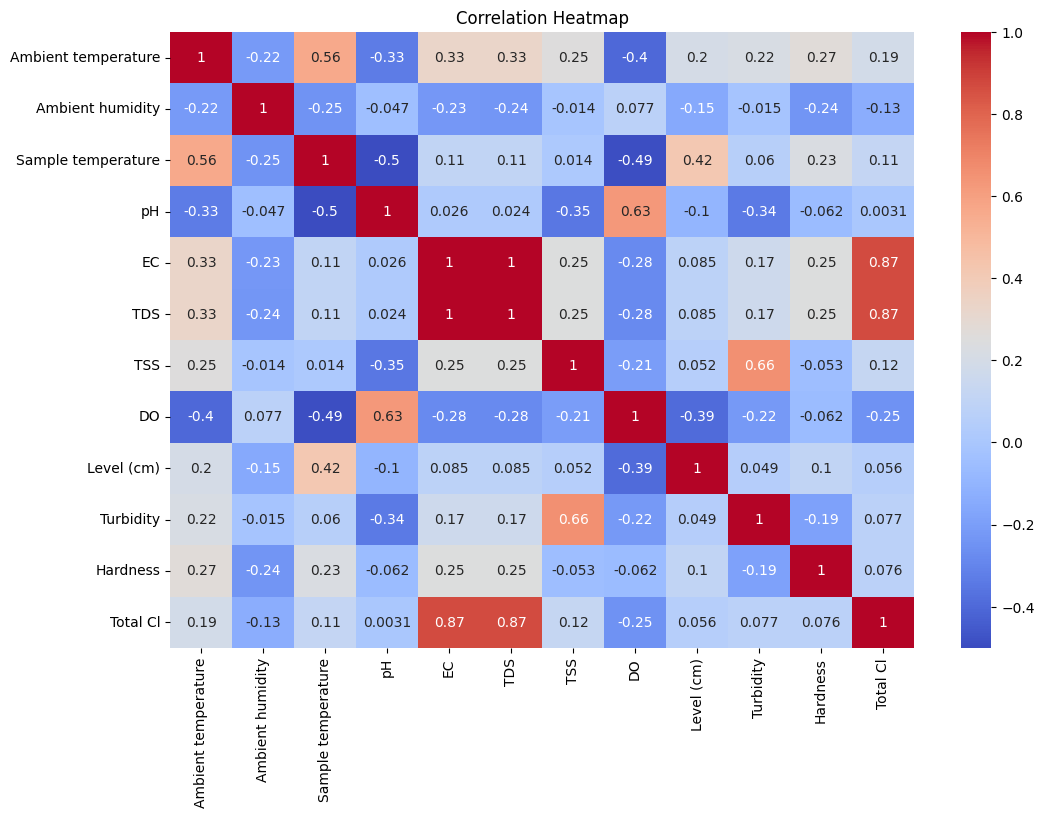

In [82]:
numerical_cols=['Ambient temperature',
       'Ambient humidity', 'Sample temperature', 'pH', 'EC', 'TDS', 'TSS',
       'DO', 'Level (cm)', 'Turbidity', 'Hardness',
       'Total Cl']
# df.corr()
plt.figure(figsize=(12, 8))  # Adjust the size as needed

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [54]:
df['pH'].corr(df['Ambient temperature'])

np.float64(-0.333460339968779)

# Overtime improvements

In [57]:
improved=df

In [58]:
improved.columns

Index(['Date', 'Time', 'Sampling point', 'Ambient temperature',
       'Ambient humidity', 'Sample temperature', 'pH', 'EC', 'TDS', 'TSS',
       'DO', 'Level (cm)', 'Turbidity', 'Hardness', 'Hardness classification',
       'Total Cl'],
      dtype='object')

In [79]:
xx=improved.sort_values(by='Date',ascending=True)
xx[xx['Sampling point']=='Puente Bilbao']

,Date,Time,Sampling point,Ambient temperature,Ambient humidity,Sample temperature,pH,EC,TDS,TSS,DO,Level (cm),Turbidity,Hardness,Hardness classification,Total Cl
0,2023-05-09,14:15:00,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,0.0,144.954083,147.000000,BLANDA,156.000000
1,2023-06-14,14:30:00,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,0.0,41.200000,94.000000,BLANDA,78.000000
2,2023-06-14,14:30:00,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,0.0,38.900000,86.000000,BLANDA,82.000000
10,2023-06-23,12:30:00,Puente Bilbao,10.4,0.87,13.8,8.1,1220,600,28.0,4.47,0.0,118.000000,102.000000,BLANDA,121.000000
9,2023-06-23,12:30:00,Puente Bilbao,10.4,0.87,13.9,8.2,1250,620,28.0,4.55,0.0,60.500000,102.000000,BLANDA,121.000000
20,2023-06-26,14:15:00,Puente Bilbao,18.2,0.77,15.3,8.0,1290,630,110.0,1.94,0.0,397.000000,106.000000,BLANDA,126.000000
19,2023-06-26,14:15:00,Puente Bilbao,18.2,0.77,15.3,7.8,1280,630,110.0,2.03,0.0,622.000000,106.000000,BLANDA,128.000000
30,2023-06-28,13:30:00,Puente Bilbao,14.4,0.40,16.1,8.2,1240,610,40.0,4.32,0.0,44.800000,106.000000,BLANDA,99.000000
29,2023-06-28,13:30:00,Puente Bilbao,14.4,0.40,15.6,8.3,1240,610,40.0,4.59,0.0,40.800000,110.000000,BLANDA,99.000000
40,2023-07-05,15:15:00,Puente Bilbao,18.0,0.60,18.1,7.7,1170,580,92.0,1.35,28.0,1000.000000,114.000000,BLANDA,95.000000


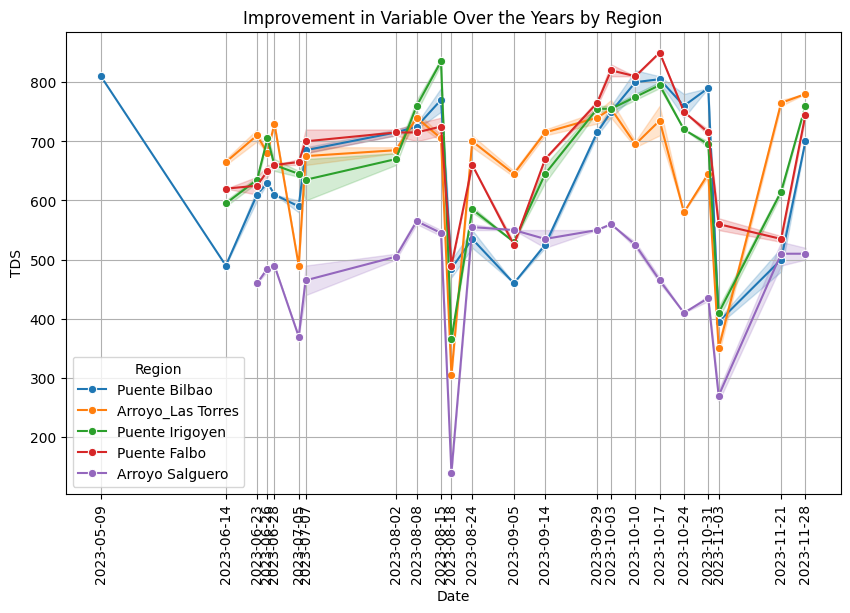

In [63]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=improved, x='Date', y='TDS', hue='Sampling point', marker='o')

# Add titles and labels
plt.title('Improvement in Variable Over the Years by Region')
plt.xlabel('Date')
plt.ylabel('TDS')
plt.xticks(improved['Date'].unique(),rotation=90)  # Ensure all years are shown on x-axis
plt.grid(True)
plt.legend(title='Region')
plt.show()


In [80]:
def improvement_calc(variable):
    improved=df.sort_values(by='Date',ascending=True)
    improvement = improved.groupby('Sampling point').agg({variable: ['first', 'last']})

# Calculate change and percentage change
    improvement['Change'] = improvement[variable]['last'] - improvement[variable]['first']
    improvement['Percentage Change'] = (improvement['Change'] / improvement[variable]['first']) * 100

# Reset index for better readability
    improvement.columns = ['First', 'Last', 'Change', 'Percentage Change']
    improvement = improvement.reset_index()

# Display the results
    return improvement

In [81]:
improvement_calc('pH')

,Sampling point,First,Last,Change,Percentage Change
0,Arroyo Salguero,8.2,7.6,-0.6,-7.317073
1,Arroyo_Las Torres,8.3,8.2,-0.1,-1.204819
2,Puente Bilbao,8.3,7.8,-0.5,-6.024096
3,Puente Falbo,8.0,7.2,-0.8,-10.000000
4,Puente Irigoyen,8.2,7.9,-0.3,-3.658537


### Observations